# 1.6 Anvendelse: Estimering av hastighet fra akselerasjonsdata
La oss gå tilbake til eksempelet med dronen fra notatet om numerisk derivasjon.
Den gangen brukte vi at hastigheten $v(t)$ er den deriverte av posisjonen $x(t)$ med hensyn på tid $t$, $x'(t) = v(t)$.
Hvis vi igjen deriverer hastigheten med hensyn på tid vil vi få akselerasjonen $a(t)$, det vil si $x''(t) = v'(t) = a(t)$.
Dermed kan vi alternativt finne hastigheten ved å integrere akselerasjonen, gitt at denne (og starthastigheten $v(0)$) er kjent for oss,
$$ v(t) = v(0) + \int_0^t a(s)\,\mathrm{d}s. $$

Vi tenker oss derfor at dronen er utstyrt med et *akselerometer*, hvor vi er gitt en rekke målinger $\{a_k\}_{k=0}^n$ av akselerasjonen for $t_k = k h$, $h>0$, og vi antar at dronen er i ro ved $t_0 = 0$.
Da kan vi bruke en av metodene for numerisk integrasjon ovenfor til å tilnærme hastigheten $v(t_k)$.
For eksempel, med trapesmetoden vil tilnærmingen $v_k$ være gitt av
$$ v_k = S_k = \frac{h}{2}\sum_{j=1}^k (a_{j-1}+a_j), \qquad k \in \{1,\dots,n\}. $$

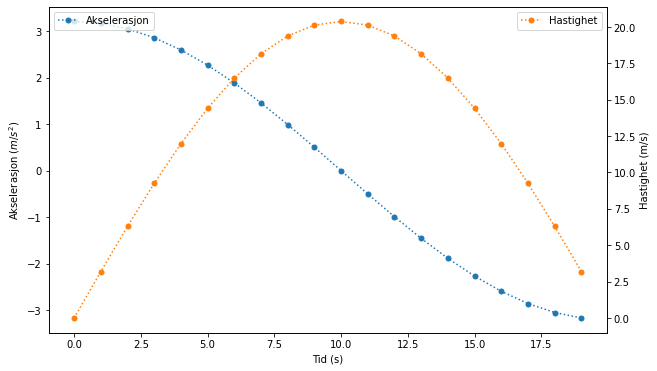

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# a_n er en logg med akselerasjonsmålinger gitt i m/s
a_n = np.array([ 3.20762143e+00,  3.16813029e+00,  3.05062926e+00,  2.85801162e+00,
                2.59502025e+00,  2.26813086e+00,  1.88539257e+00,  1.45622966e+00,
                9.91209535e-01,  5.01782545e-01,  1.96410166e-16, -5.01782545e-01,
               -9.91209535e-01, -1.45622966e+00, -1.88539257e+00, -2.26813086e+00,
               -2.59502025e+00, -2.85801162e+00, -3.05062926e+00, -3.16813029e+00])

h = 1 # Skrittlengde lik 1 sekund
t_n = np.arange(0, h*len(a_n), h) # Array med måletidspunkt

v_n = np.zeros(len(a_n)) # Integral over tid
S = 0 # Samlet integral

# Løkke for å utføre numerisk integrasjon
for n in range(1,len(a_n)):
        S += (a_n[n] + a_n[n-1])/2*h
        v_n[n] = S

# Plott akselerasjonsdata og hastighetsdata
plt.figure(figsize=(10,6))
plt.plot(t_n, a_n, ':o', markersize=5, label = "Akselerasjon")
plt.legend(loc='upper left')
plt.ylabel("Akselerasjon ($m/s^2$)")
plt.xlabel('Tid (s)')
plt.twinx()
plt.plot(t_n, v_n, ':oC1', markersize=5, label= "Hastighet")
plt.ylabel("Hastighet (m/s)")
plt.legend(loc='upper right')
#plt.grid(True)

Ovenfor ser vi akselerasjonsålingene $a_k$ i blått, og de estimerte hastighetene $v_k$ i oransje. Dersom vi ser tilbake til de estimerte hastighetene vi fant med numerisk derivasjon av posisjonsdata, ser vi at denne kurven stemmer godt overens med kurven vi fant tidligere.

> $\impliedby$ [1.5 Numerisk integrasjon: trapesmetoden og Simpsons metode](1_diffint_trapesSimpson.ipynb) |